In [1]:
import numpy as np
import pandas as pd


In [2]:
births=pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
# let's add a decade column then take a look at female and male births as a function of decade.

births['decade']=10*(births['year']//10)

In [4]:
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [5]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


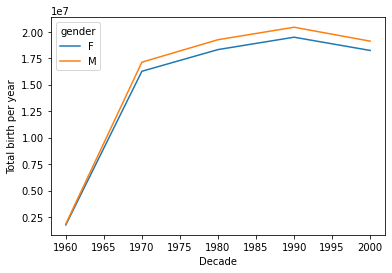

In [6]:
# the result is male birth and female birth in every decade.
# to see this trend a bit more clearly, we can use the built-in plotting tool in Pandas to visualize

import matplotlib.pyplot as plt
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum').plot()
plt.ylabel('Total birth per year')
plt.xlabel('Decade')
plt.show()

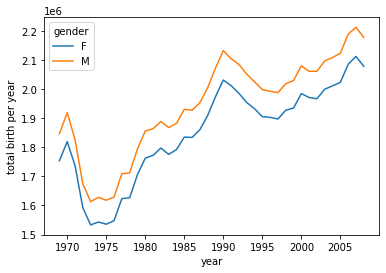

In [7]:
births.pivot_table('births', index='year',columns='gender', aggfunc='sum').plot()
plt.ylabel('total birth per year')
plt.xlabel('year')
plt.show()

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

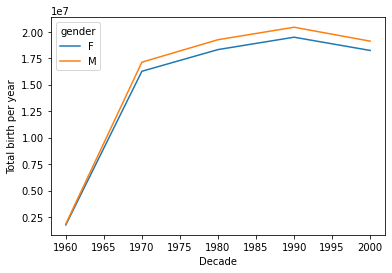

In [8]:

import matplotlib.pyplot as plt
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum').plot()
plt.ylabel('Total birth per year')
plt.xlabel('Decade')
plt.bar()

<BarContainer object of 1 artists>

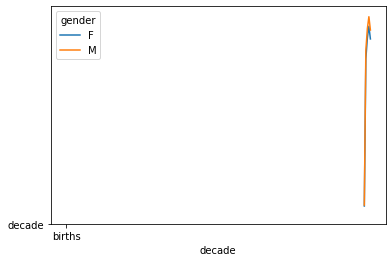

In [9]:
import matplotlib.pyplot as plt
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum').plot()
plt.bar('births','decade')

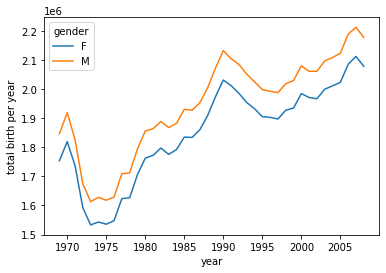

In [10]:
births.pivot_table('births', index='year',columns='gender', aggfunc='sum').plot()
plt.ylabel('total birth per year')
plt.xlabel('year')
plt.show()


In [11]:
# futher data exploration

quartiles=np.percentile(birth['births'],25,50,75)
mu=quartiles[1]
sig=0,74*(quartiles[2]-quartiles[0])

NameError: name 'birth' is not defined

In [12]:
# futher data exploration

quartiles=np.percentile(births['births'],25,50,75)
mu=quartiles[1]
sig=0,74*(quartiles[2]-quartiles[0])

AxisError: axis 50 is out of bounds for array of dimension 1

In [13]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [14]:
#this final line is a robust estimate of sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution

births=births.query('(births>@mu -5*@sig) & (births<@mu + 5 * @sig)')

In [15]:
# set 'day' column to integer; it orginally was a string due to nulls
births['day']=births['day'].astype(int)

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
births['day'] = births['day'].astype(int)

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
births.day=births.day.astype(int)

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
births

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29,M,5944,1980
15063,1988,12,30,F,5742,1980
15064,1988,12,30,M,6095,1980
15065,1988,12,31,F,4435,1980


In [19]:
births.day.head()

0    1
1    1
2    2
3    2
4    3
Name: day, dtype: int32

In [20]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [21]:
# create a datetime index from the year, month, day
births.index=pd.to_datetime(10000*births.year+100*births.month+births.day,format='%Y%m%d')
births['dayofweek']=births.index.dayofweek

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
import matplotlib as mlb


In [23]:
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


AttributeError: 'AxesSubplot' object has no attribute 'sex_xticklabels'

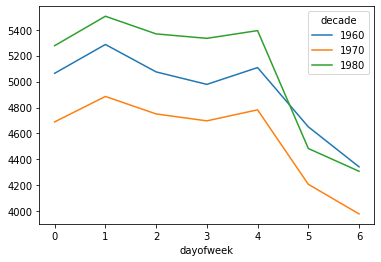

In [24]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().sex_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0, 0.5, 'mean births by day')

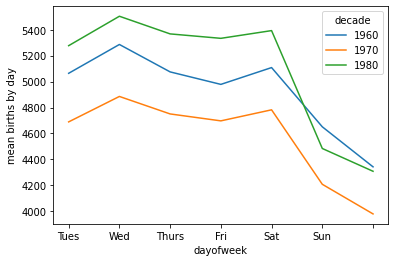

In [25]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [26]:
births_by_date=births.pivot_table('births',[births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [27]:
births_by_date.index=[pd.datetime(2012,month,day) for (month,day) in births_by_date.index]

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [28]:
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


In [29]:
import datetime

In [30]:
births_by_date.index=[datetime(2012,month,day) for (month,day) in births_by_date.index]

TypeError: cannot unpack non-iterable Timestamp object

In [31]:
births_by_date.index=[pd.datetime(2012,month,day) for (month,day) in births_by_date.index]

TypeError: cannot unpack non-iterable Timestamp object

In [32]:
# plot the results
fig,ax = plt.subplot(figsize=(12,4))
births_by_date.plt(ax=ax)

AttributeError: 'AxesSubplot' object has no property 'figsize'

<Figure size 432x288 with 0 Axes>

In [33]:
# plot the results
fig,ax = plt.subplot(figsize=(12,4))
births_by_date.plt(ax=ax)

AttributeError: 'AxesSubplot' object has no property 'figsize'

<Figure size 432x288 with 0 Axes>

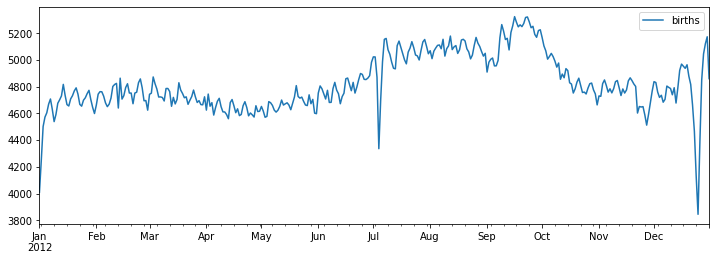

In [34]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);